# Linear Algebra Review - Numpy

## Introduction
Images are represented in python as matrices
The meaning of the numbers recorded in those matrices varies depending on the coordinate system employed, but the matrix is the operational form of the image

Fortunately, matrix manipulation underlies much of scientific computing, so many libraries in different languages have been developed to facilitate effecient matrix computation
`Numpy` is one such package for python: https://numpy.org/
Numpy abstracts away much of the complexities of memory management associated with large scale matrix operations that must be explicitly managed in old-school scientific computing in C or Fortran

`Scipy` builds on the `numpy` foundation by including functions that perform frequently-used matrix operations used in the sciences

While numpy interface makes matrix operations straightforward, the reviewing the linear algebra that underlies much of the image processing we'll be performing is worthwhile

Below I'll be reviewing both the use of numpy and demonstrating basic principles of linear algebra with it. 

## Index
* [Introduction] (#Introduction)
* [Lit and linnks] (#lit-and-links)
* [Using Numpy] (#using-numpy)
* [Creating Vectors] (#creating-vectors-and-matrices)
* [Coordinate Systems] (#thresholding)
* [Vector Multiplication] (#opening-and-closing)
* [De-noising] (#de-noising)
* [Edge Detection] (#edge-detection)
* [Image Normalization] (#image-normalization)
* [Color Normalization] (#color-normalizaiton)
* [object detection] (#object-detection)
* [object characterization) (#object characterization)

## Using Numpy
Numpy offers an interface for vector and matrix creation and manipulation


### Creating Vectors
creating a vector is simple in numpy  
simply pass the contents of the vector as a tuple or list to the array function

In [1]:
import numpy as np

a = np.array([1,2,3])
a

array([1, 2, 3])

In [2]:
a.shape

(3,)

In [3]:
a.size

3

In [4]:
a.dtype

dtype('int64')

In [5]:
a.data

As the above code shows, a *Vector* can be defined as a list of numers passed to the np.array function. 
The resulting array object has several properties:  
> `shape` - a tuple of the dimensions of the array in (x,y)/(m,n) order  
> `size` - an integer describing the number of elements in the array  
> `dtype` - the underlying encoding of the numbers recorded in the array - relevant if   ranges or rounding errors are a concern  
> `ndim` - the number of dimensions in the array  
> `data` - the actual values recorded in the array object  


### Creating Matrices
Like creating a vector, creating a matrix simply consists of passing lists of elements to the array function
In numpy, additional lists of values could be thought of as stacking atop the prior list of elements

In [6]:
b = np.array(([1,2,3], [4,5,6]))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
b.shape

(2, 3)

In [8]:
b.size

6

In [9]:
b.dtype

dtype('int64')

In [10]:
b.data

As with vectors, *Matrices* can be defined as a list of numers passed to the np.array function. 
The resulting array object has several properties:  
> `shape` - a tuple of the dimensions of the array in (x,y)/(m,n) order  
> `size` - an integer describing the number of elements in the array  
> `dtype` - the underlying encoding of the numbers recorded in the array - relevant if ranges or rounding errors are a concern  
> `ndim` - the number of dimensions in the array  
> `data` - the actual values recorded in the array object  



### Creating Placeholder Arrays
sometimes to capture the results of an operation it is useful to define a 'blank' matrix of a constant value  
    in numpy the `zeros((dim))`, `ones((dim))`, and `empty((dim),fillVal)` functions can create such 'blank' matrices 

In [11]:
c = np.ones((3,4))
c

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [12]:
c.shape

(3, 4)

In [13]:
c.size

12

In [14]:
c.dtype

dtype('float64')

In [15]:
c.data

### Plotting Vectors in matplotlib
Visualization can be helpful in understanding what linear operations are doing  
using matplotlib, we can view our vectors and the results of transformations on them  
source: https://stackoverflow.com/questions/13430231/how-i-can-get-cartesian-coordinate-system-in-matplotlib

Remeber that a vector is many things
> a collection of numbers
> a set of distances along a coordinate axis
> a point representing the distances along each orthogonal coordinate aspect specified 
> a line in space connecting the origin to the point in n-dimensional space
> A solution to an infinite number of linear equations


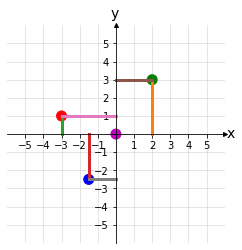

In [16]:
from pylab import *
import matplotlib.pyplot as plt

x = [0,2,-3,-1.5]
y = [0,3,1,-2.5]
color=['m','g','r','b']

# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1


fig = plt.figure()
ax = fig.add_subplot(111)

scatter(x,y, s=100 ,marker='o', c=color)

[ plot( [dot_x,dot_x] ,[0,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ] 
[ plot( [0,dot_x] ,[dot_y,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ]

left,right = ax.get_xlim()
low,high = ax.get_ylim()


# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])


# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()



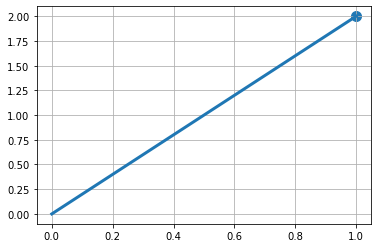

In [17]:
#below, a simplified plot displays a vector r

r=(1,2)

fig = plt.figure()
ax=fig.add_subplot(111)

scatter(r[0],r[1], s=100, marker = "o", label = "r")

plot([r[0],0],[r[1],0], '-', linewidth = 3)
#plot((0,2),(0,2), '-', linewidth = 3)
#plot((2,0),(2,0), '-', linewidth = 3)


left,right = ax.get_xlim()
low,high = ax.get_ylim()
#arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
#arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 ) 

grid()

show()

### Vector plotting function
This example needs to be digested into a more general function I can use to plot vectors


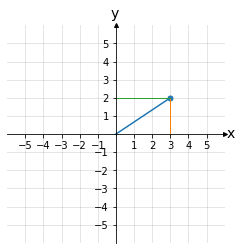

In [19]:
def plotVector(vector, show_Components=True, xmin=-5, ymin=-5, xmax=5,ymax=5, tick_Frequencty = 1): 
    
    # Extract the input vector to pass into the function
    x = vector[0]
    y = vector[1]
    
    # Select length of axes and the space between tick labels
    gridDims = [xmin, xmax, ymin, ymax]
    ticks_frequency = 1


    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Place the point and the line for the vector
    scatter(x,y, s=25 ,marker='o')
    plot([x,0],[y,0], '-', linewidth=1.5)
    
    if show_Components:
        plot([x,x], [0,y], '-', linewidth=1)
        plot([0,x], [y,y], '-', linewidth=1)

    # Set identical scales for both axes
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

    # Create custom major ticks to determine position of tick labels
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])


    # Create minor ticks placed at each integer to enable drawing of minor grid
    # lines: note that this has no effect in this example with ticks_frequency=1
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    plt.show()

plotVector((3,2))